In [1]:
import pandas as pd
import seaborn as sns

# uncomment the following only if further customizations are required
#import matplotlib.pyplot as plt 
#%matplotlib inline

## Part 1: Text-based EDA

In [2]:
df_pokemon_raw_data = pd.read_csv('/home/ngarg/Downloads/Pokemon.csv', encoding='latin1')

In [3]:
df_pokemon_raw_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [4]:
df_pokemon_raw_data.shape

(151, 13)

In [5]:
df_pokemon_raw_data.nunique()

#            151
Name         151
Type 1        15
Type 2        11
Total         74
HP            42
Attack        46
Defense       44
Sp. Atk       34
Sp. Def       29
Speed         42
Stage          3
Legendary      2
dtype: int64

In [6]:
df_pokemon_raw_data['Type 1'].value_counts()

Water       28
Normal      22
Poison      14
Bug         12
Grass       12
Fire        12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Dragon       3
Ghost        3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

In [7]:
df_pokemon_raw_data['Type 2'].value_counts()

Poison      19
Flying      19
Ground       6
Psychic      6
Water        4
Ice          3
Fairy        3
Rock         2
Grass        2
Steel        2
Fighting     1
Name: Type 2, dtype: int64

In [8]:
col_typs = [type(col) for col in df_pokemon_raw_data.iloc[0, :]]
print(col_typs)

[<class 'numpy.int64'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.bool_'>]


## Part 2: EDA using Viz

### Scatterplot to see relationship pattern between 'Attack' and 'Defence' features

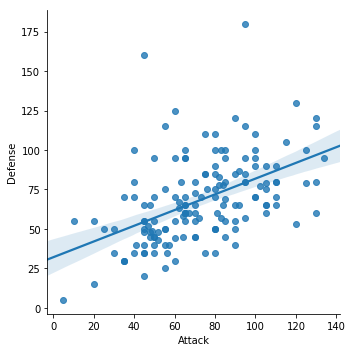

In [9]:
sns.lmplot(x='Attack', y='Defense', data=df_pokemon_raw_data)

#### Removing the regression line

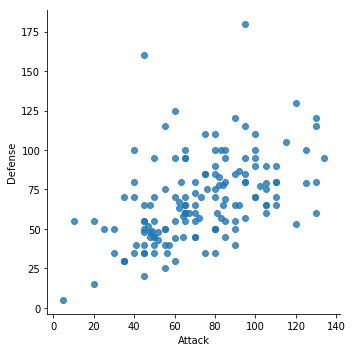

In [10]:
sns.lmplot(x='Attack', y='Defense', data=df_pokemon_raw_data, fit_reg=False)

#### Adding information from another feature as a different color (grouping) using the 'hue' parameter

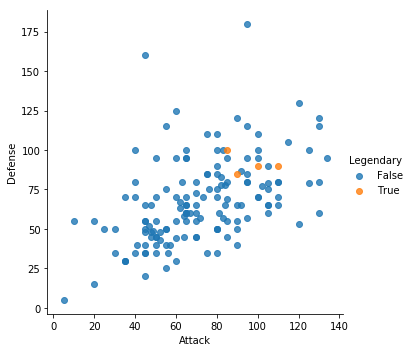

In [11]:
sns.lmplot(x='Attack', y='Defense', data=df_pokemon_raw_data, fit_reg=False, hue='Legendary')

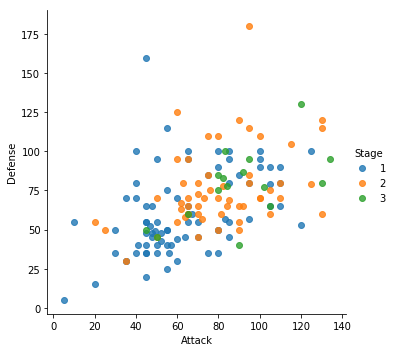

In [12]:
sns.lmplot(x='Attack', y='Defense', data=df_pokemon_raw_data, fit_reg=False, hue='Stage')

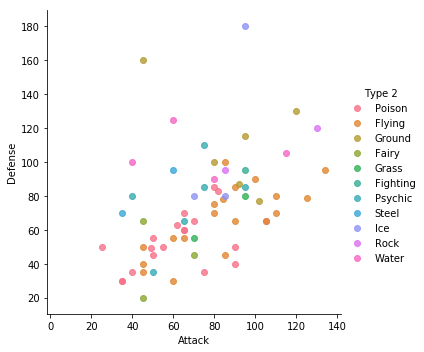

In [13]:
sns.lmplot(x='Attack', y='Defense', data=df_pokemon_raw_data, fit_reg=False, hue='Type 2')

### Multiple Scatterplots (faceting) using 'relplot' and its 'col' parameter

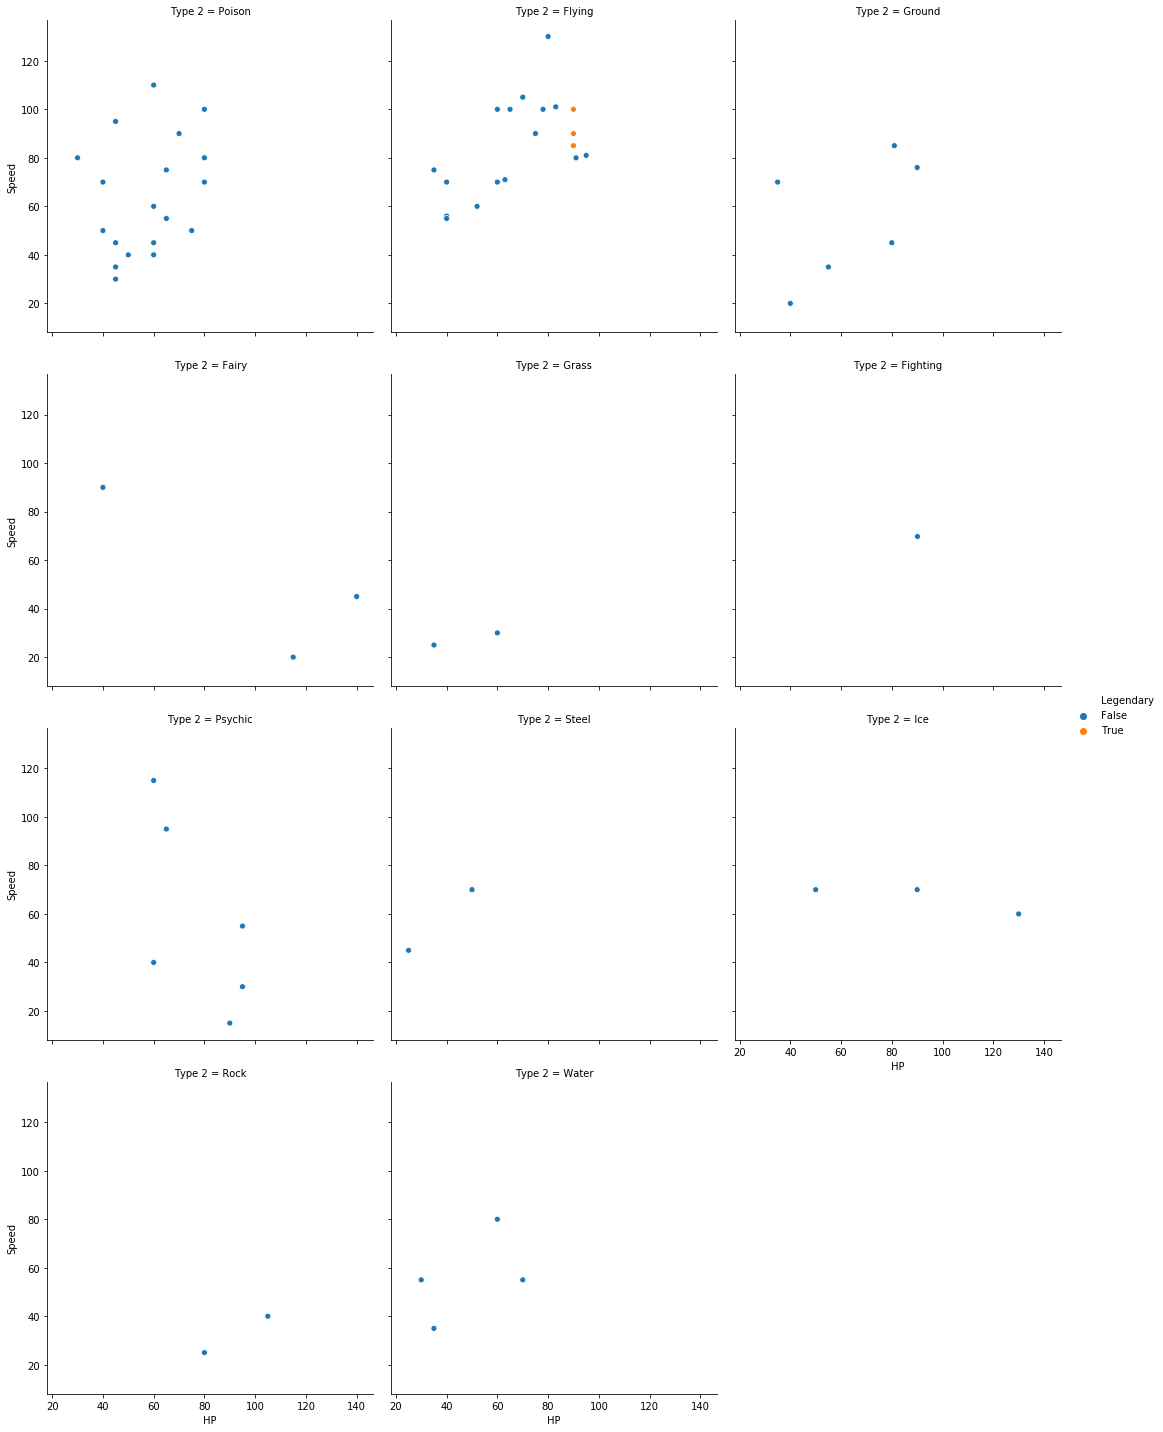

In [14]:
p = sns.relplot(x="HP", y="Speed", col='Type 2', hue='Legendary', col_wrap=3, data=df_pokemon_raw_data)

### Boxplot to show:
###   - min & max (whiskers boundaries) 
###   - 1st, 2nd and 3rd quartiles (box boundaries)
###   - outliers (isolated diamonds)

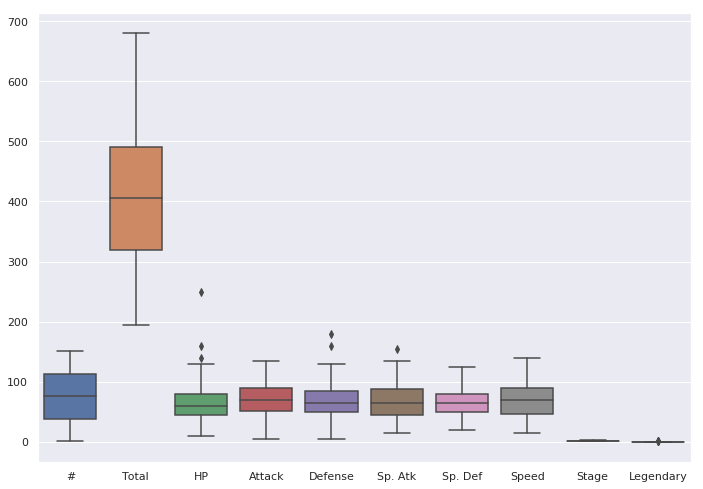

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df_pokemon_raw_data)

#### Creating a copy of a slice of the dataframe, then converting them to categorical as Box plot is designed to work with categorical data

In [16]:
df_catf = df_pokemon_raw_data[['Type 1', 'Type 2', 'Stage', 'Legendary']]
df_catf = df_catf.astype('category')

In [17]:
df_catf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
Type 1       151 non-null category
Type 2       67 non-null category
Stage        151 non-null category
Legendary    151 non-null category
dtypes: category(4)
memory usage: 2.0 KB


In [18]:
df_catf.head()

,Type 1,Type 2,Stage,Legendary
0,Grass,Poison,1,False
1,Grass,Poison,2,False
2,Grass,Poison,3,False
3,Fire,NaN,1,False
4,Fire,NaN,2,False


#### convert to category codes (as boxplot shows summary stats)

In [19]:
df_catf['Type 1'] = df_catf['Type 1'].cat.codes
df_catf['Type 2'] = df_catf['Type 2'].cat.codes
df_catf['Stage'] = df_catf['Stage'].cat.codes
df_catf['Legendary'] = df_catf['Legendary'].cat.codes

In [20]:
df_catf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
Type 1       151 non-null int8
Type 2       151 non-null int8
Stage        151 non-null int8
Legendary    151 non-null int8
dtypes: int8(4)
memory usage: 684.0 bytes


In [21]:
df_catf.head()

,Type 1,Type 2,Stage,Legendary
0,7,6,0,0
1,7,6,1,0
2,7,6,2,0
3,5,-1,0,0
4,5,-1,1,0


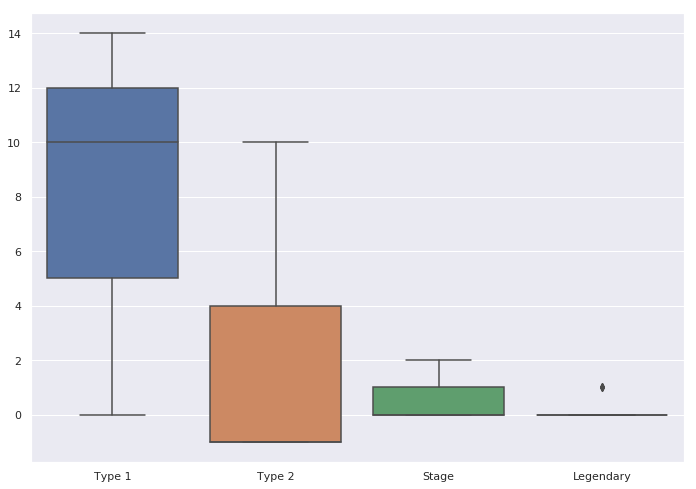

In [22]:
sns.boxplot(data=df_catf)

#### compare the above plot with the summary stats

In [23]:
df_catf.describe()

,Type 1,Type 2,Stage,Legendary
count,151.000000,151.000000,151.000000,151.000000
mean,8.463576,1.523179,0.582781,0.026490
std,4.529569,3.334335,0.676832,0.161122
min,0.000000,-1.000000,0.000000,0.000000
25%,5.000000,-1.000000,0.000000,0.000000
50%,10.000000,-1.000000,0.000000,0.000000
75%,12.000000,4.000000,1.000000,0.000000
max,14.000000,10.000000,2.000000,1.000000


### Violin plot to show distribution and density estimation of data

#### Works best with lots of observations (here we have only 151 observations)

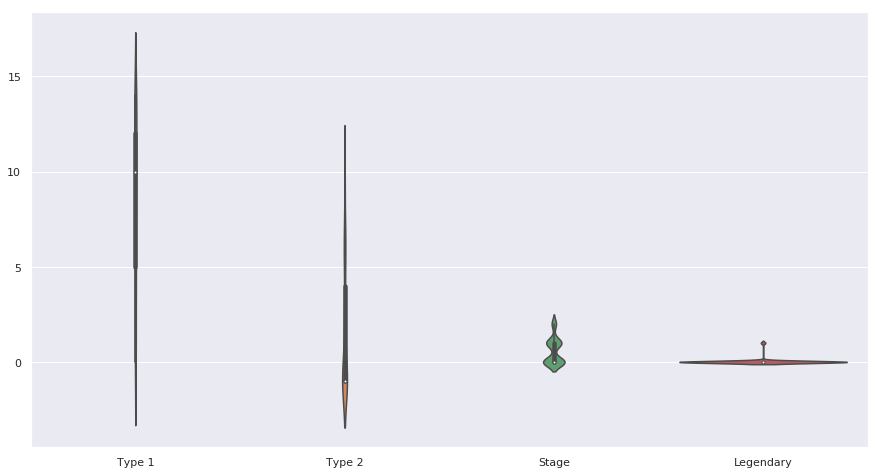

In [24]:
sns.set(rc={'figure.figsize':(15,8)})
sns.violinplot(data=df_catf)

#### Relating the above plot with data

In [25]:
df_catf['Type 2'].value_counts()

-1     84
 6     19
 2     19
 7      6
 4      6
 10     4
 5      3
 0      3
 9      2
 8      2
 3      2
 1      1
Name: Type 2, dtype: int64

In [26]:
df_catf['Stage'].value_counts()

0    79
1    56
2    16
Name: Stage, dtype: int64

In [27]:
df_catf['Legendary'].value_counts()

0    147
1      4
Name: Legendary, dtype: int64

In [28]:
df_pokemon_raw_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,43.734045,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,1.000000,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,38.500000,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,76.000000,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,113.500000,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,151.000000,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


### Strip plot to show data points with distribution, useful for comparing variables (in a way it is an alternative to box and violin plots, but not a replacement of those)

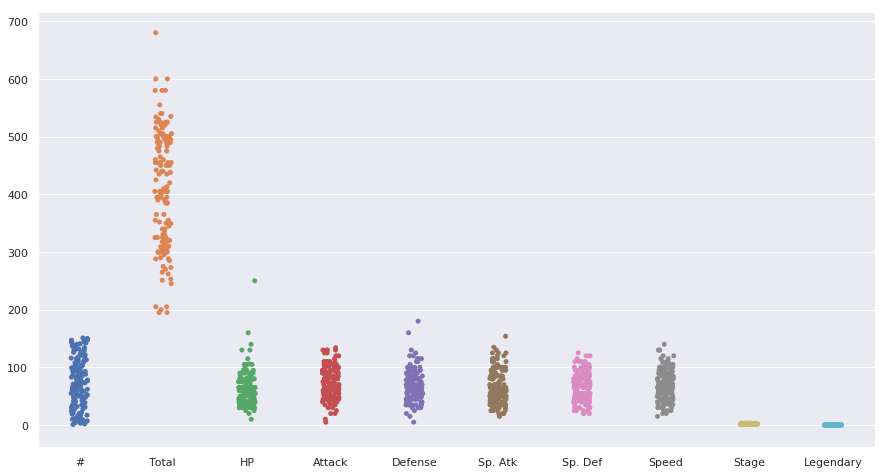

In [29]:
sns.stripplot(data=df_pokemon_raw_data)

#### Strip plot with violin plot overlay for one variable

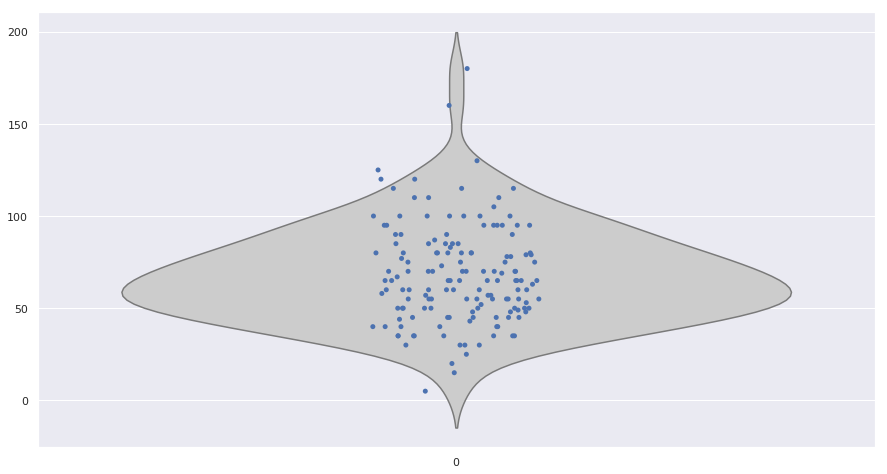

In [30]:
ax = sns.violinplot(data=df_pokemon_raw_data.Defense, inner=None, color='.8')
ax = sns.stripplot(data=df_pokemon_raw_data.Defense)

### Heatmap to show multivariate relations (here we are showing correlations between variables)

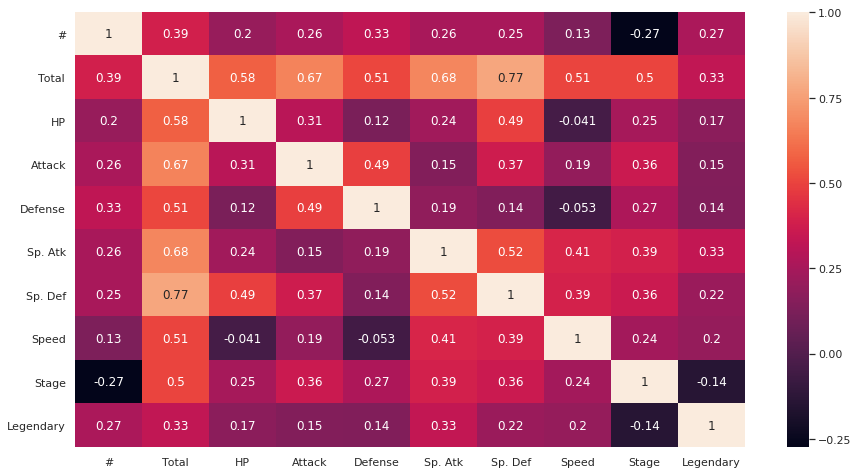

In [31]:
df_pokemon_raw_data_corr = df_pokemon_raw_data.corr()
sns.heatmap(data=df_pokemon_raw_data_corr, annot=True)